In [1]:
import pandas as pd
import janitor
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Arohi Shiraskar\Downloads\energy_dataset.csv.txt")

In [3]:
df = janitor.clean_names(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation_biomass                           35045 non-null  float64
 2   generation_fossil_brown_coal_lignite         35046 non-null  float64
 3   generation_fossil_coal_derived_gas           35046 non-null  float64
 4   generation_fossil_gas                        35046 non-null  float64
 5   generation_fossil_hard_coal                  35046 non-null  float64
 6   generation_fossil_oil                        35045 non-null  float64
 7   generation_fossil_oil_shale                  35046 non-null  float64
 8   generation_fossil_peat                       35046 non-null  float64
 9   generation_geothermal                        35046 non-null  float64
 10

In [5]:
df.describe()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_coal_derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [6]:
df = df.dropna(axis = 1, how='all')

# Convert time to date time

df['time'] = pd.to_datetime(df['time'], utc= True)

# Set time as the index

df = df.set_index('time')

In [7]:
# Check for duplicates
df.duplicated().sum()

0

Good, no duplicates that could cause overfitting to our model.

In [8]:
# Function that plots time series of each column

def plot_series(df: pd.DataFrame(), column= None, label = None, ylabel= None, title= None, start = 0, end= None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 14))
    
    ax.set_xlabel('Time', fontsize=16)
    
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
        
    if title:
        ax.set_title(title, fontsize = 24)
    
    ax.grid(True)
    return ax

In [9]:
df.columns

Index(['generation_biomass', 'generation_fossil_brown_coal_lignite',
       'generation_fossil_coal_derived_gas', 'generation_fossil_gas',
       'generation_fossil_hard_coal', 'generation_fossil_oil',
       'generation_fossil_oil_shale', 'generation_fossil_peat',
       'generation_geothermal', 'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run_of_river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_marine',
       'generation_nuclear', 'generation_other', 'generation_other_renewable',
       'generation_solar', 'generation_waste', 'generation_wind_offshore',
       'generation_wind_onshore', 'forecast_solar_day_ahead',
       'forecast_wind_onshore_day_ahead', 'total_load_forecast',
       'total_load_actual', 'price_day_ahead', 'price_actual'],
      dtype='object')

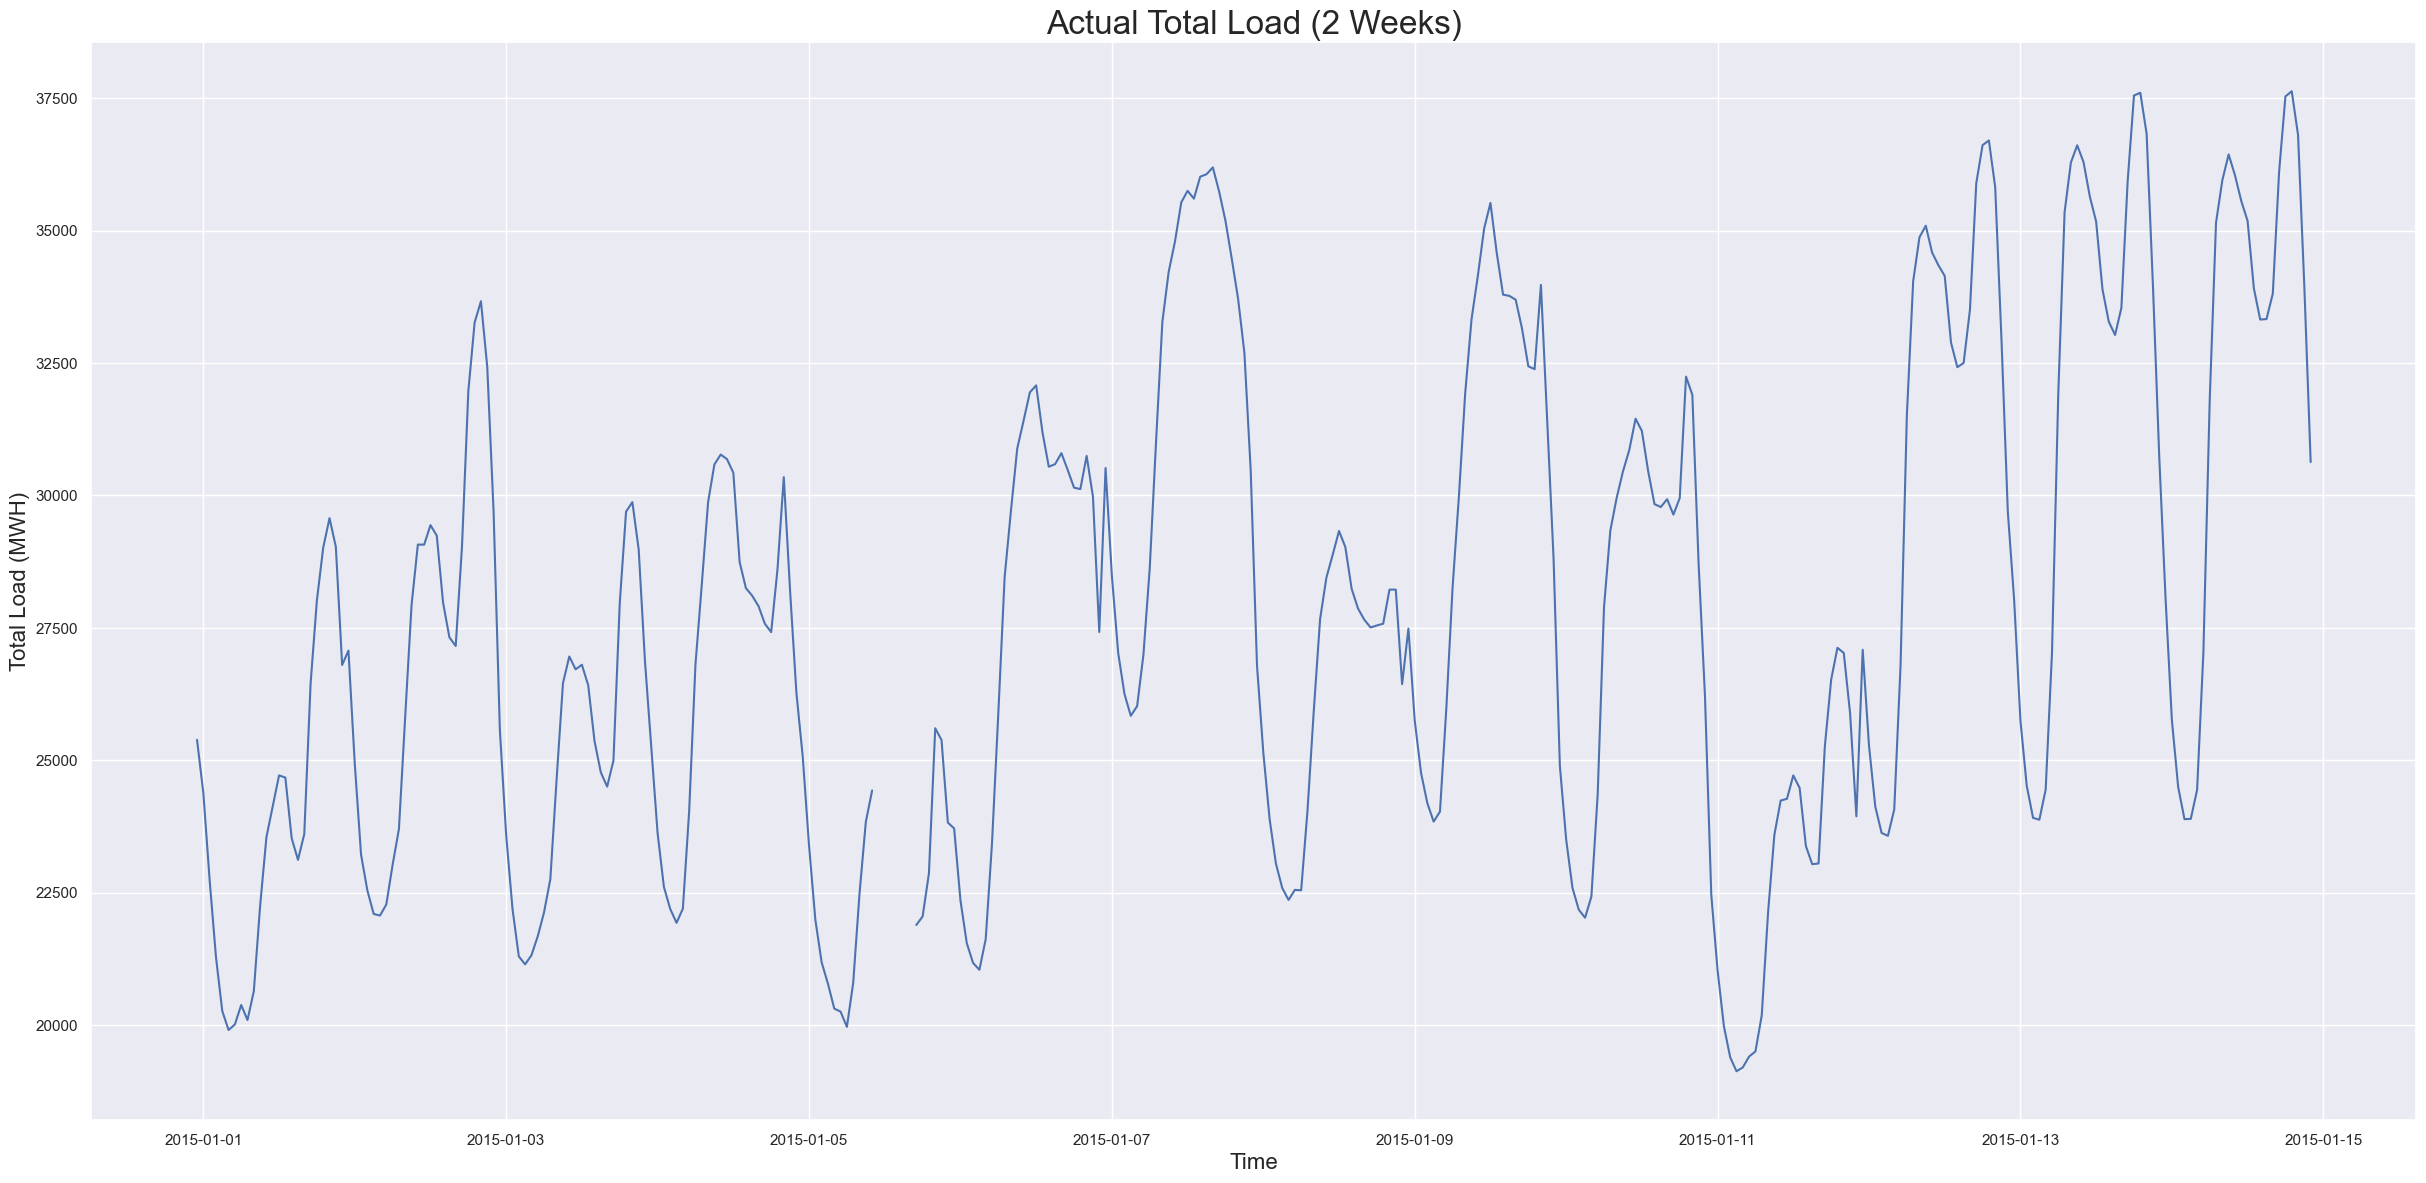

In [10]:
ax1 = plot_series(df, 'total_load_actual', ylabel='Total Load (MWH)', title='Actual Total Load (2 Weeks)', end=24*7*2)


plt.show()

#### Going to need to address the NAs for each column to connect the dots

In [11]:
# Use interpolation to address those values

df = df.interpolate(method='linear', limit_direction='forward', axis = 0)

#### This looks better

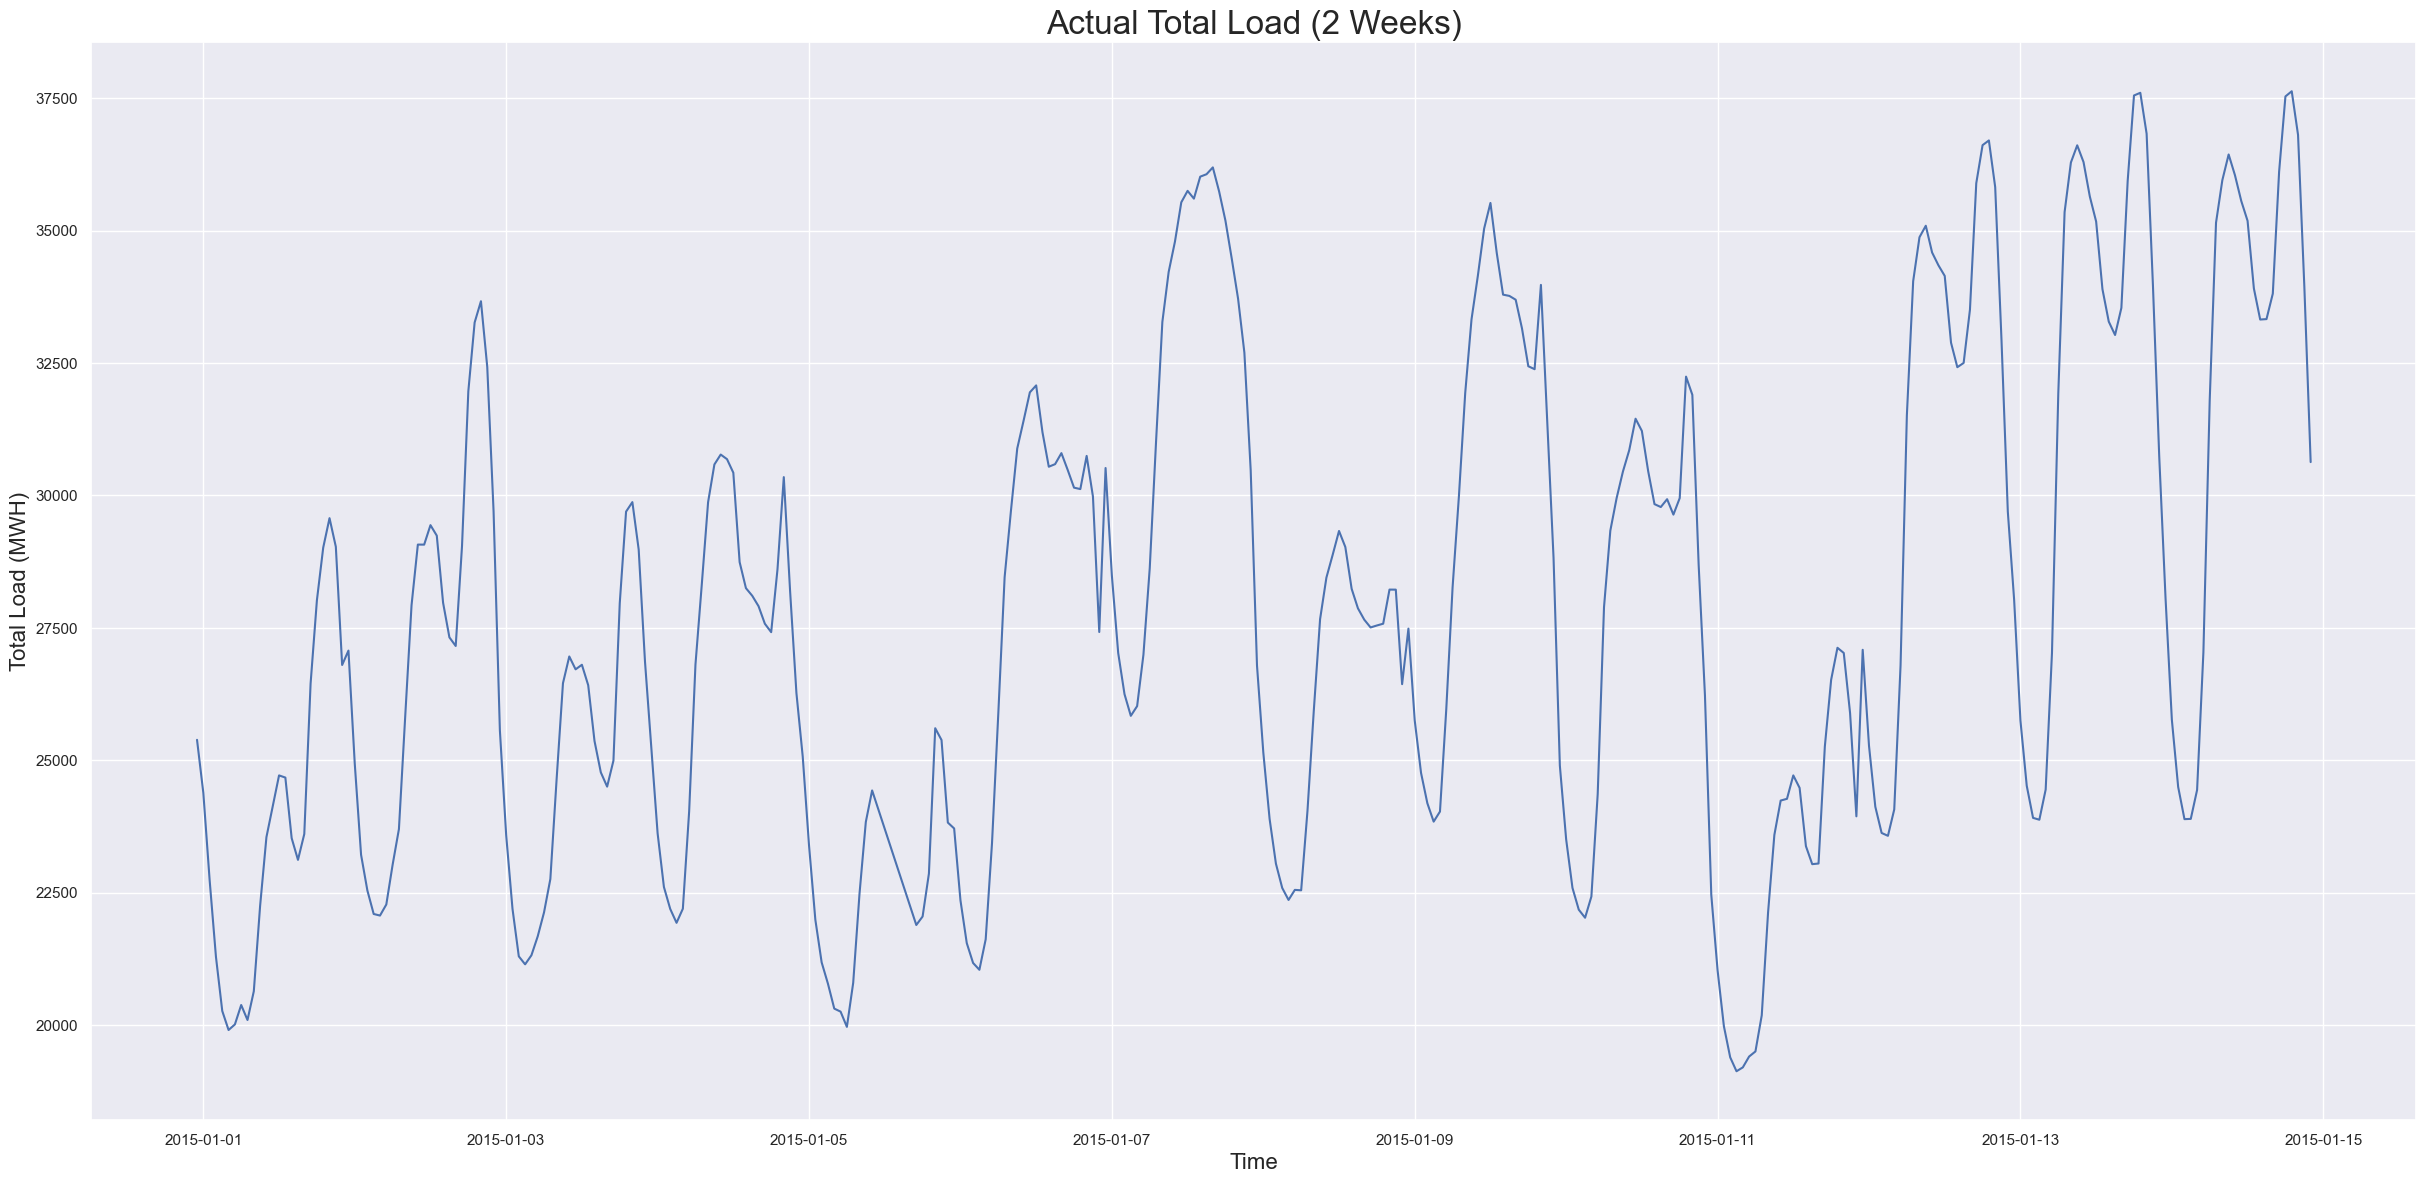

In [12]:
ax2 = plot_series(df, 'total_load_actual', ylabel='Total Load (MWH)', title='Actual Total Load (2 Weeks)', end=24*7*2)


plt.show()

In [13]:
# Need to remove columns with all 0s

df = df.loc[:, (df != 0).any(axis=0)]

In [14]:
# First feature: business hours

for i in range(len(df)):
    position = df.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    
    df.loc[position, 'hour'] = hour
    df.loc[position, 'weekday'] = weekday
    df.loc[position, 'month'] = month

In [15]:
df.head()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,hour,weekday,month
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,23.0,2.0,12.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,0.0,3.0,1.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,1.0,3.0,1.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,2.0,3.0,1.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,3.0,3.0,1.0


In [16]:
df.isna().sum()

generation_biomass                             0
generation_fossil_brown_coal_lignite           0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run_of_river_and_poundage     0
generation_hydro_water_reservoir               0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_onshore                        0
forecast_solar_day_ahead                       0
forecast_wind_onshore_day_ahead                0
total_load_forecast                            0
total_load_actual                              0
price_day_ahead                                0
price_actual                                   0
hour                

In [17]:
correlations = df.corr(method='pearson')

print(correlations['price_actual'].sort_values(ascending=False).to_string())

price_actual                                   1.000000
price_day_ahead                                0.732155
generation_fossil_hard_coal                    0.465637
generation_fossil_gas                          0.461452
total_load_forecast                            0.435864
total_load_actual                              0.435253
generation_fossil_brown_coal_lignite           0.363993
generation_fossil_oil                          0.285050
month                                          0.281219
generation_other_renewable                     0.255551
hour                                           0.237381
generation_waste                               0.168710
generation_biomass                             0.142671
forecast_solar_day_ahead                       0.101402
generation_other                               0.099914
generation_solar                               0.098529
generation_hydro_water_reservoir               0.071910
generation_nuclear                            -0

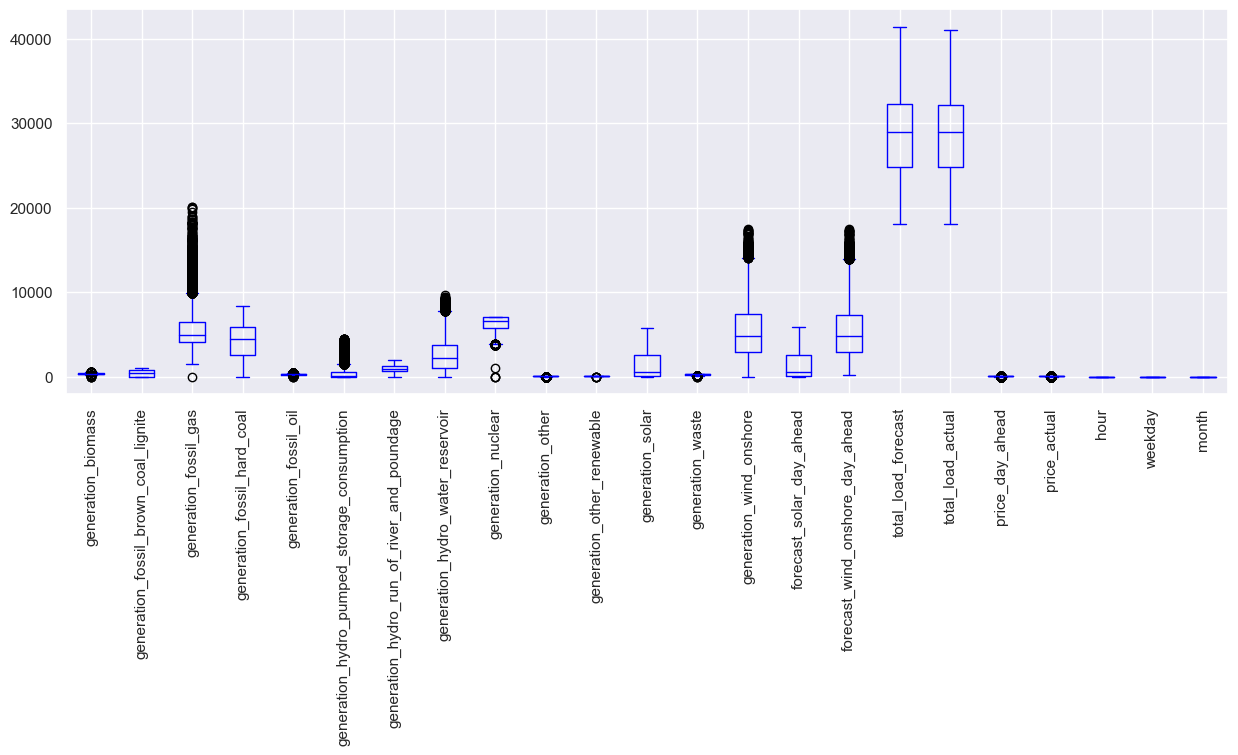

In [18]:
df.boxplot(rot='vertical', color='blue',figsize=(15, 5))

plt.show()

Text(0.5, 1.0, 'Hourly boxplots of total load')

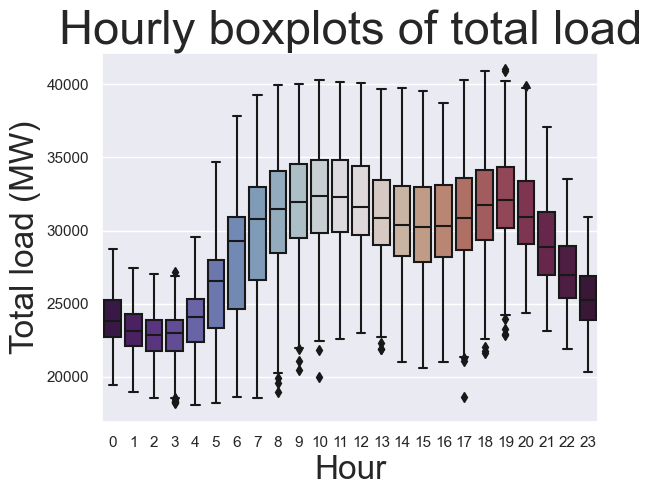

In [19]:
sns.boxplot(x=df.index.hour, y='total_load_actual', data=df, palette="twilight_shifted")
plt.ylabel('Total load (MW)', fontsize=24)
plt.xlabel('Hour', fontsize=24)
plt.title("Hourly boxplots of total load", fontsize=34)

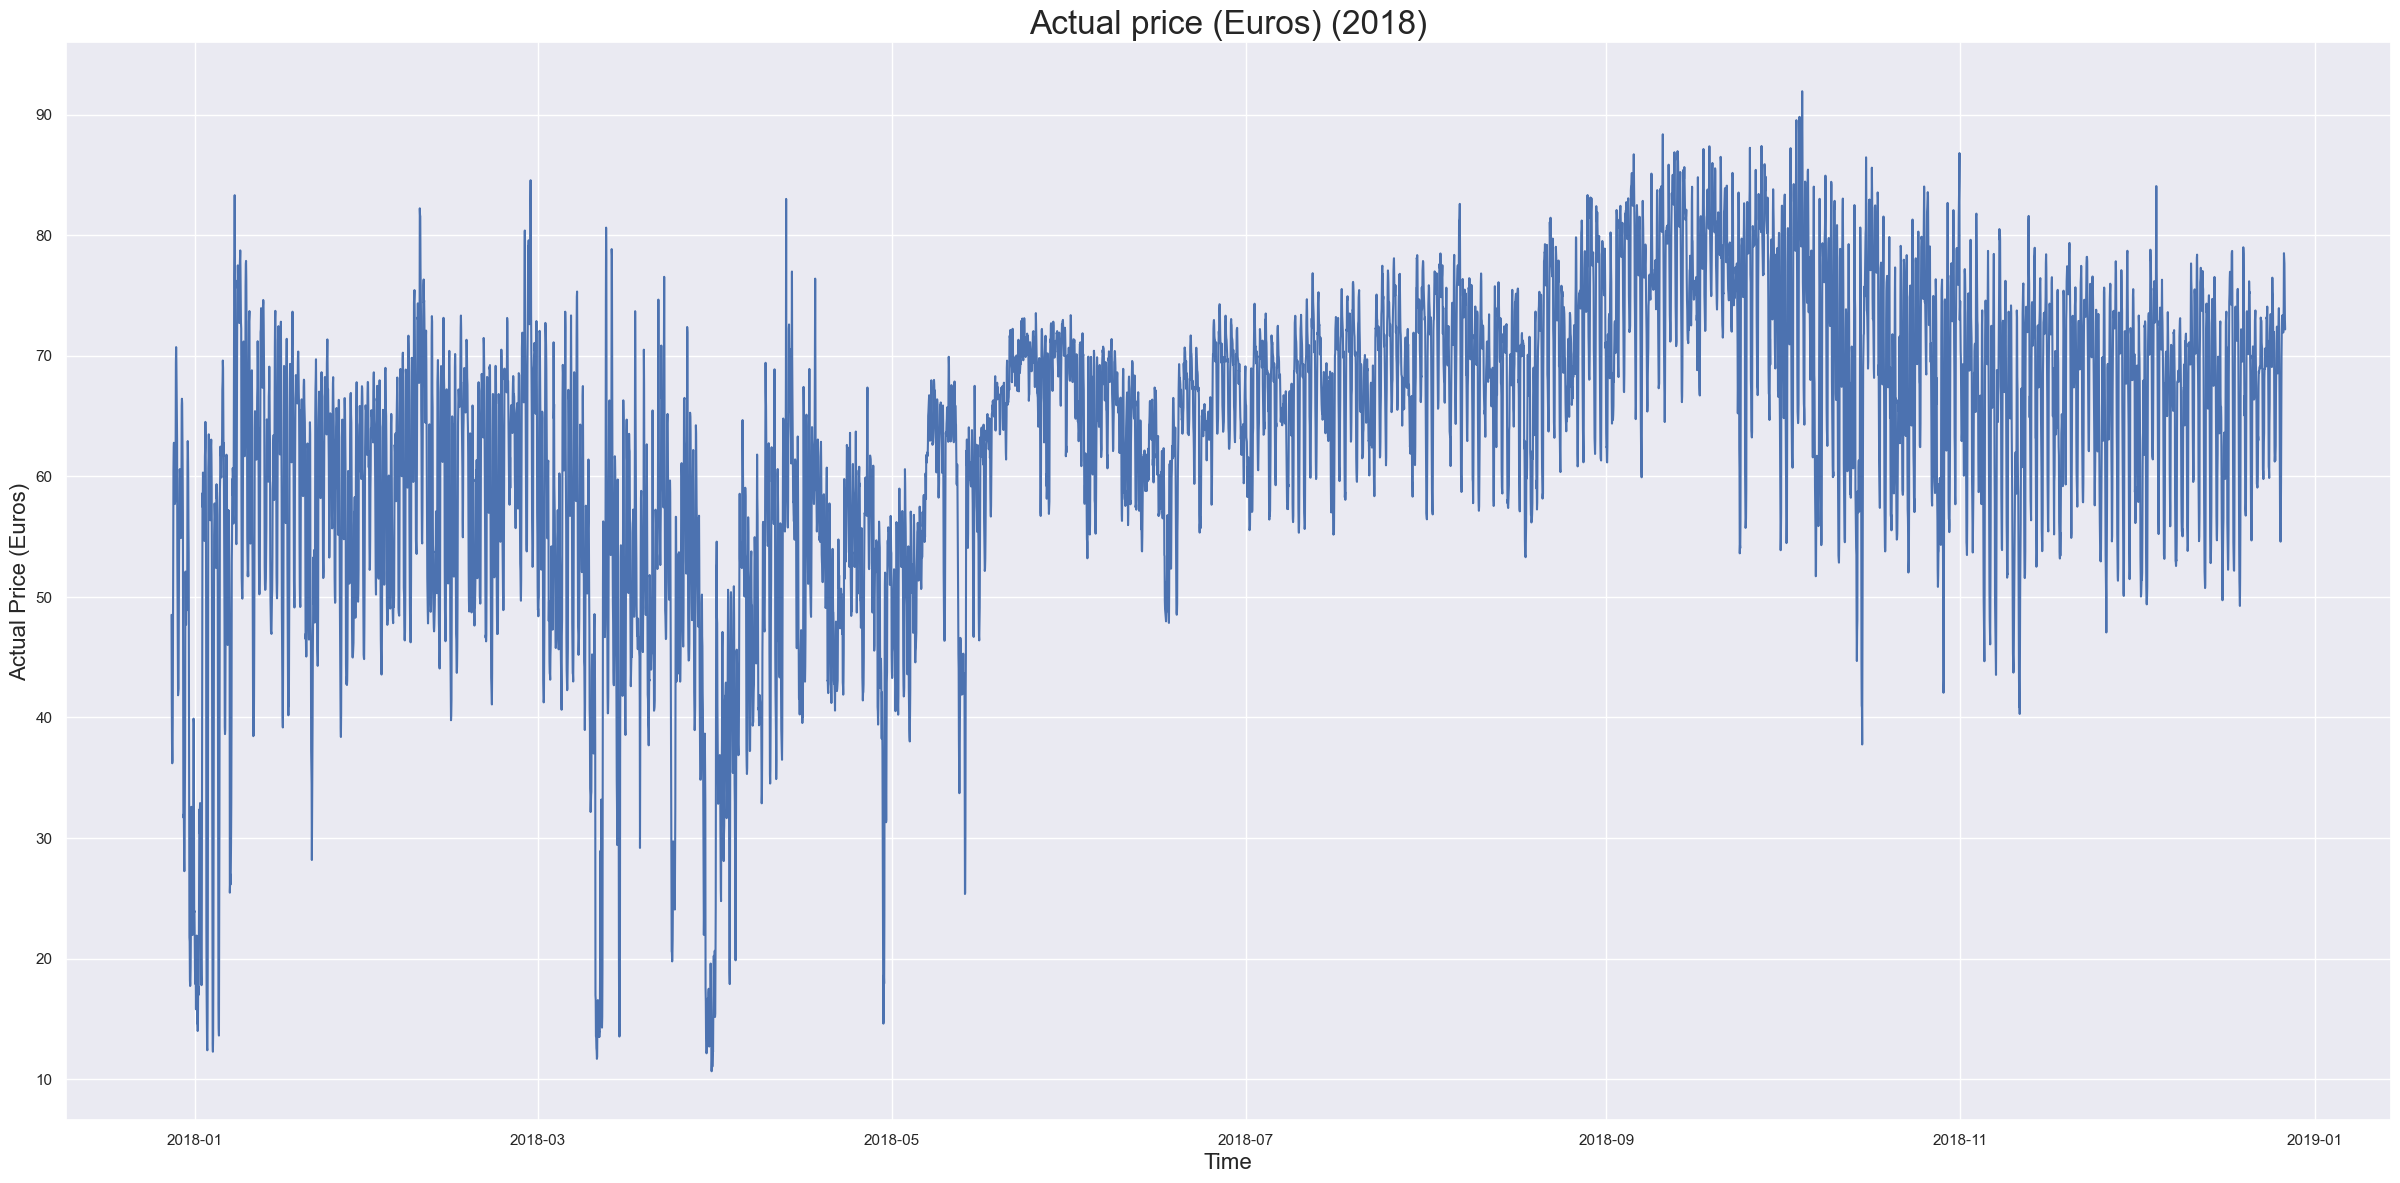

In [20]:
ax = plot_series(df, 'price_actual', ylabel='Actual Price (Euros)', title='Actual price (Euros) (2018)', start=24*7*156, end=24*7*208)


plt.show()

In [21]:
# Aggregating data to daily, monthly, yearly totals

monthly_energy_data = df.resample('M').sum()

daily_energy_data = df.resample('D').sum()

#removing first row bc its 2014-12-31, so not really needed

monthly_energy_data.drop('2014-12-31', inplace=True)
daily_energy_data.drop('2014-12-31', inplace=True)



In [22]:
daily_energy_data.head()


,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,hour,weekday,month
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,10205.0,5849.0,100507.0,98387.0,3876.0,26117.0,25366.0,53977.0,170338.0,1016.0,...,95856.0,25188.0,94618.0,594078.0,575207.0,1080.76,1490.18,276.0,72.0,24.0
2015-01-02 00:00:00+00:00,9357.0,0.0,85588.0,30195.0,4820.0,36260.0,31200.0,89007.0,170530.0,1095.0,...,265441.0,28493.0,266809.0,660466.0,652525.0,422.36,1666.65,276.0,96.0,24.0
2015-01-03 00:00:00+00:00,10485.0,0.0,82843.0,33023.0,5515.0,32666.0,33073.0,93538.0,170279.0,1876.0,...,219294.0,27201.0,218722.0,612020.0,602346.0,608.21,1565.36,276.0,120.0,24.0
2015-01-04 00:00:00+00:00,9513.0,326.0,84627.0,55567.0,8559.0,13765.0,35566.0,77887.0,166957.0,1969.0,...,192387.0,55009.0,192548.0,652029.0,650518.0,735.80,1413.89,276.0,144.0,24.0
2015-01-05 00:00:00+00:00,8879.5,955.0,105576.5,62256.5,7703.5,27964.0,27703.0,57768.5,94289.0,999.0,...,179075.5,41830.0,182604.0,536648.0,543663.0,940.98,1790.36,276.0,0.0,24.0


In [23]:
monthly_energy_data.head()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,hour,weekday,month
time,,,,,,,,,,,,,,,,,,,,,
2015-01-31 00:00:00+00:00,359164.0,423222.5,3609839.5,4014432.5,228013.0,548476.0,765829.0,1919180.0,4939765.0,51936.5,...,5646765.5,835401.0,5646656.0,22407742.0,22282247.0,35280.03,48284.68,8556.0,2304.0,744.0
2015-02-28 00:00:00+00:00,315992.0,210616.0,3141835.0,2719981.0,214640.0,489264.0,779854.0,2496817.0,4489714.0,53361.0,...,5194268.0,811222.0,5188676.0,19903758.0,19832495.0,29706.63,37909.53,7728.0,2016.0,1344.0
2015-03-31 00:00:00+00:00,348245.0,181838.0,3433721.0,3151670.0,237491.0,446991.0,873180.0,2288330.0,4976219.0,55597.0,...,5022025.0,983315.0,4997252.0,21119101.0,21152698.0,34638.26,41276.05,8556.0,2184.0,2232.0
2015-04-30 00:00:00+00:00,306979.0,334459.0,3567201.5,3471339.0,244028.0,349366.0,724554.0,1818160.0,4370058.0,43116.0,...,3950366.0,1043564.0,3947545.0,19766212.0,19751741.5,35208.56,42050.02,8280.0,2136.0,2880.0
2015-05-31 00:00:00+00:00,374663.0,279105.0,3285211.0,2991139.0,247479.0,395932.0,668073.0,2079558.0,4020439.0,61178.0,...,5029791.0,1417036.0,5034176.0,20485088.0,20436956.0,33872.87,42640.69,8556.0,2376.0,3720.0


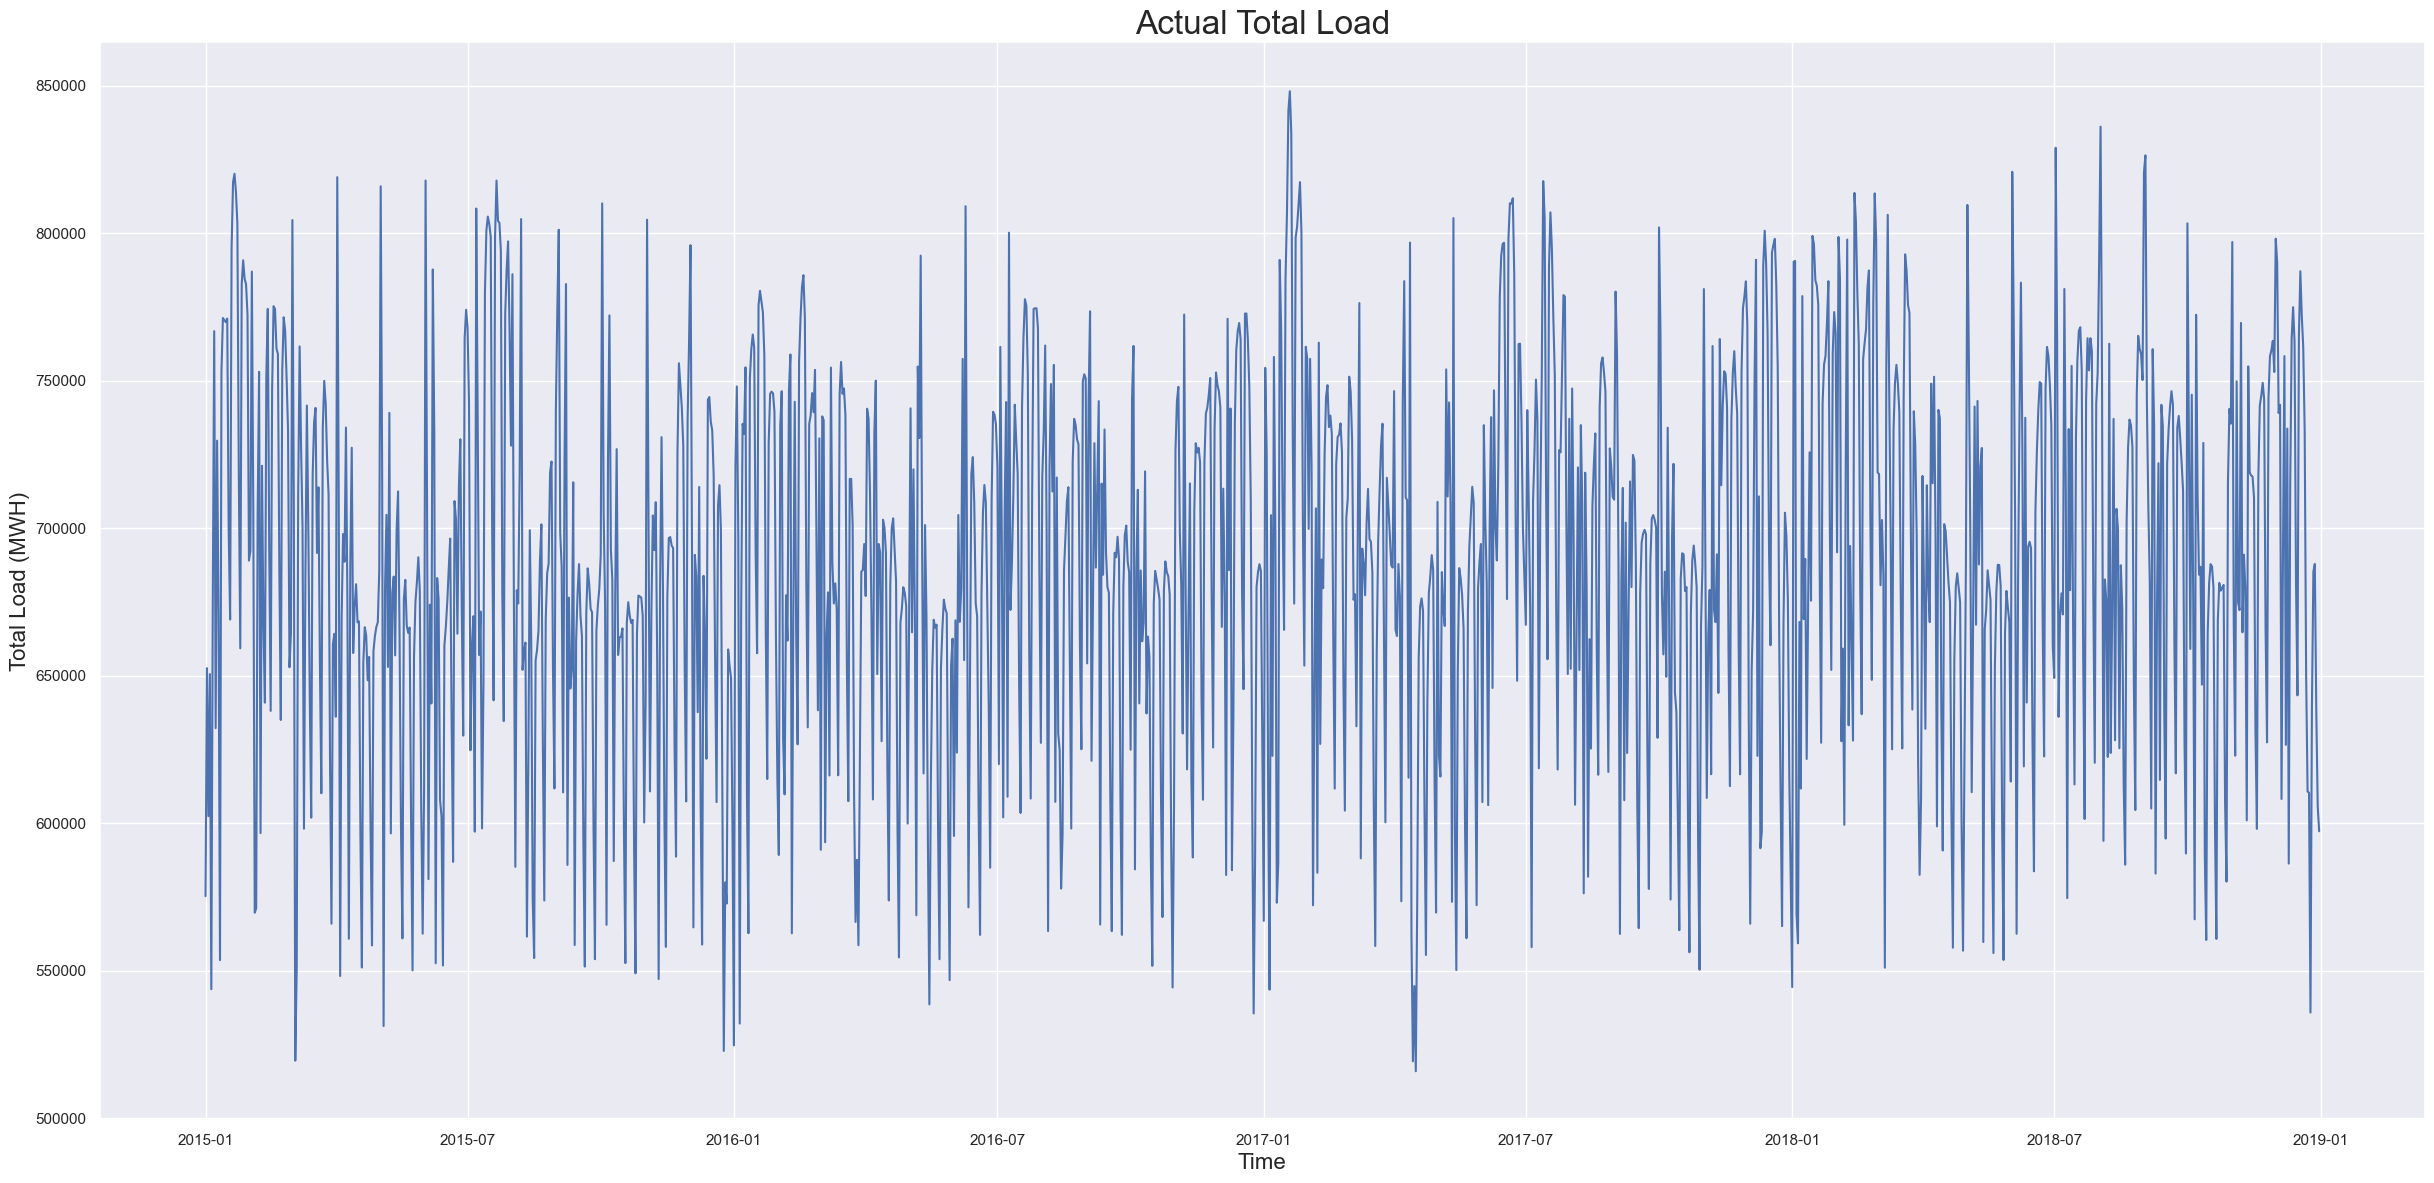

In [24]:
# based on daily basis for 4 years

daily_ax = plot_series(daily_energy_data, 'total_load_actual', ylabel='Total Load (MWH)', title='Actual Total Load')


plt.show()

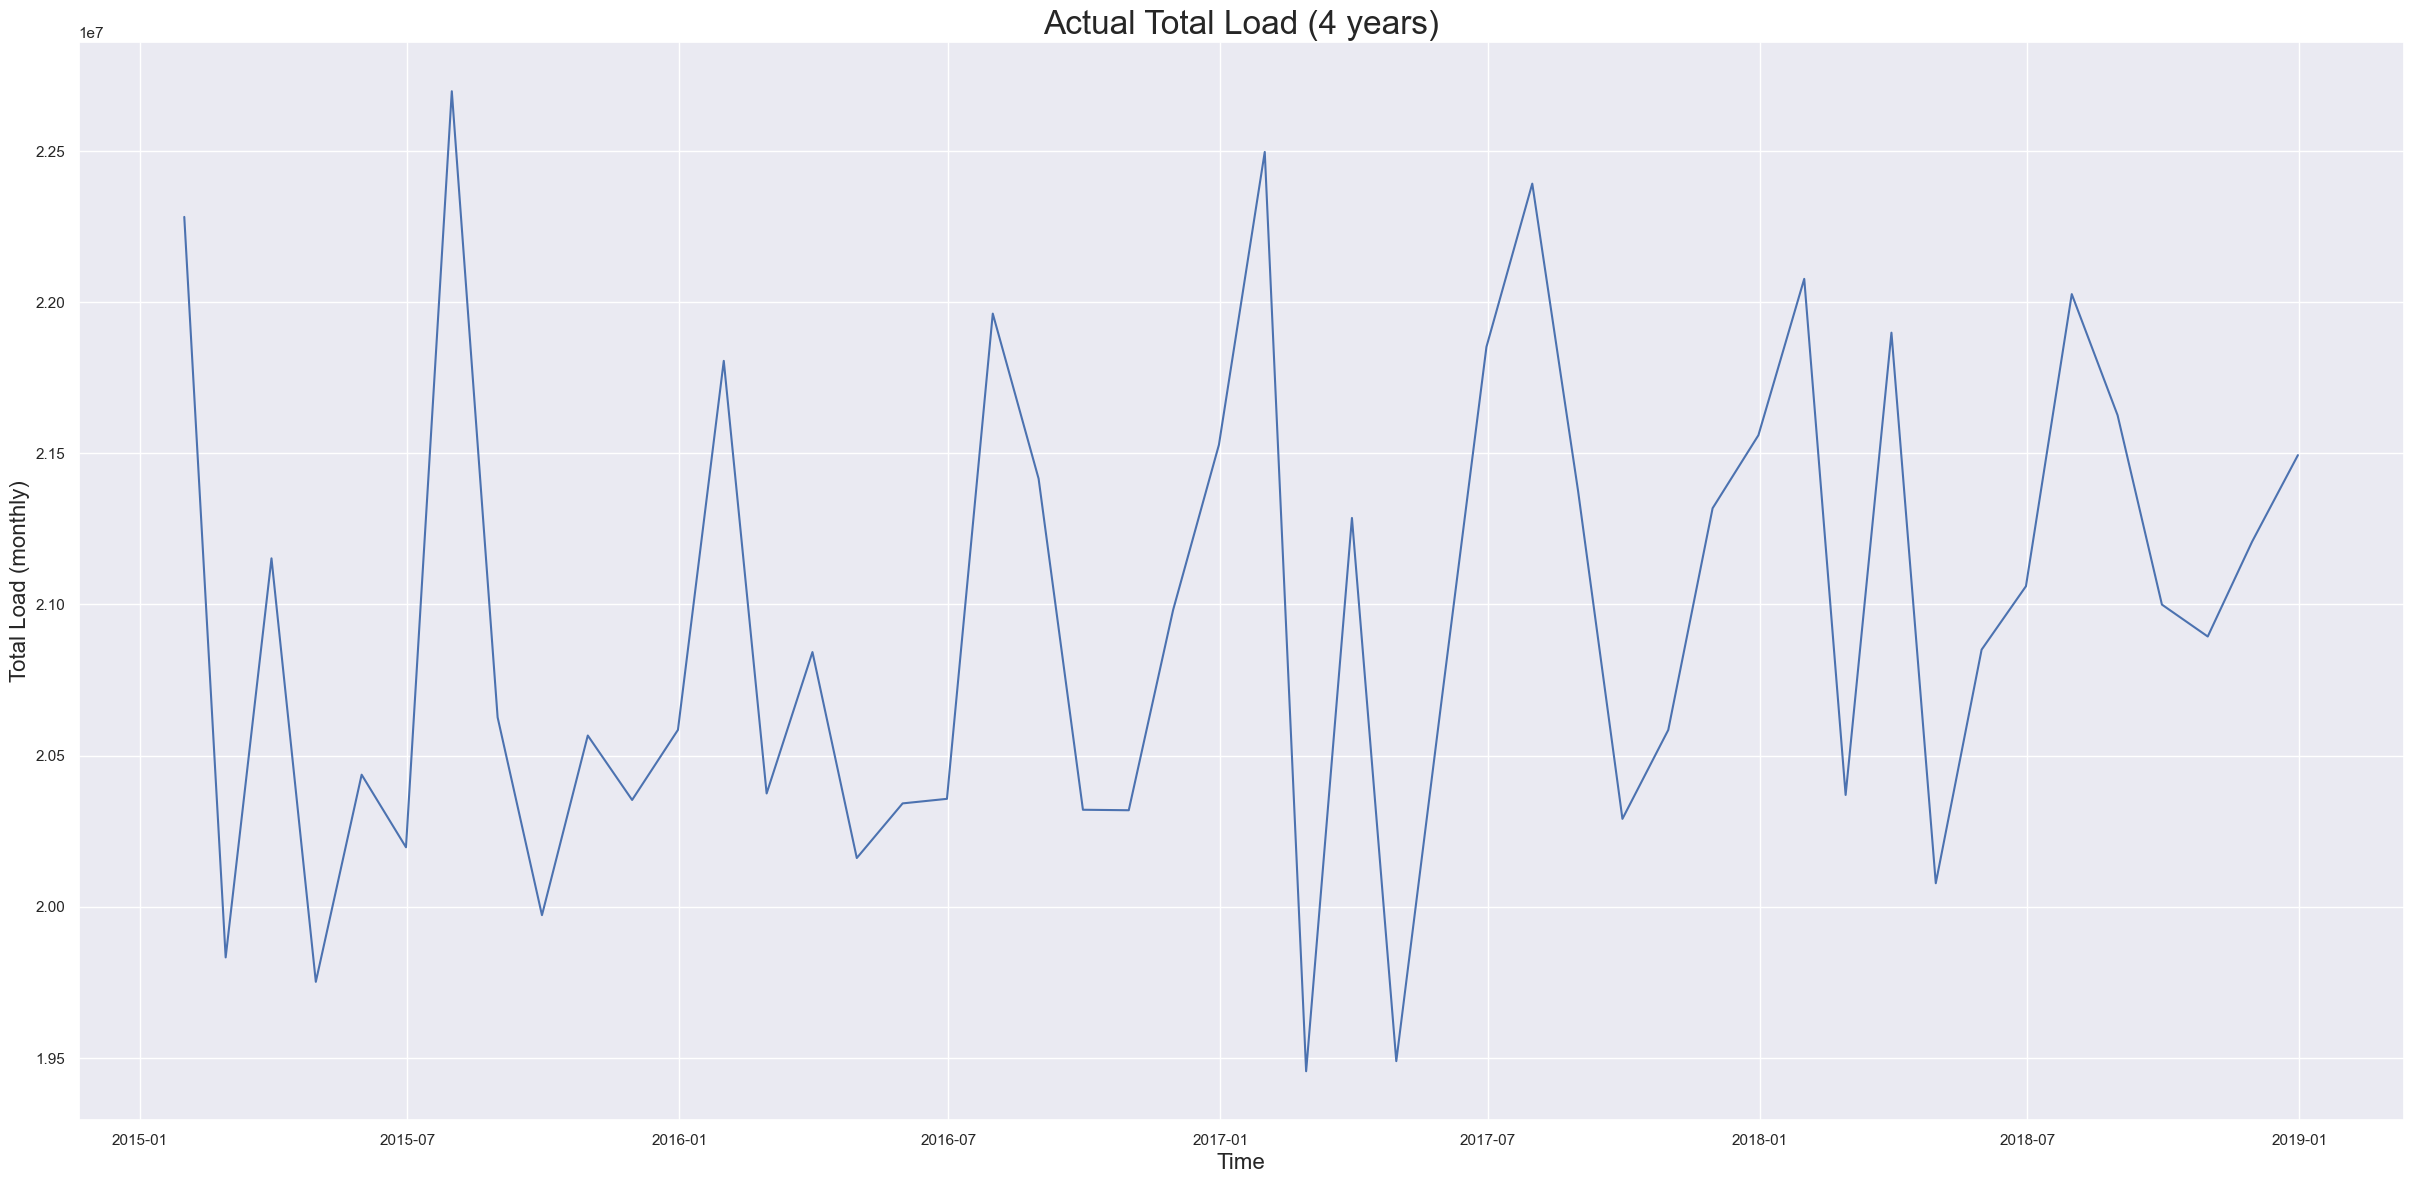

In [25]:
# based on monthly basis for 4 years

monthly_ax = plot_series(monthly_energy_data, 'total_load_actual', ylabel='Total Load (monthly)', title='Actual Total Load (4 years)')


plt.show()

In [26]:
print(df.columns)


Index(['generation_biomass', 'generation_fossil_brown_coal_lignite',
       'generation_fossil_gas', 'generation_fossil_hard_coal',
       'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run_of_river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_nuclear',
       'generation_other', 'generation_other_renewable', 'generation_solar',
       'generation_waste', 'generation_wind_onshore',
       'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead',
       'total_load_forecast', 'total_load_actual', 'price_day_ahead',
       'price_actual', 'hour', 'weekday', 'month'],
      dtype='object')


In [27]:
# segragating renewable and non-renewable (monthly)

renew_data =monthly_energy_data[['generation_biomass','generation_hydro_pumped_storage_consumption','generation_hydro_run_of_river_and_poundage',
       'generation_hydro_water_reservoir','generation_other_renewable', 'generation_solar',
       'generation_waste', 'generation_wind_onshore']]

nonrenew_data = monthly_energy_data[['generation_fossil_brown_coal_lignite',
       'generation_fossil_gas', 'generation_fossil_hard_coal',
       'generation_fossil_oil','generation_other','generation_nuclear']]


renew_data['total_renew'] = renew_data.sum(axis=1)
nonrenew_data['total_nowrenew'] = nonrenew_data.sum(axis=1)

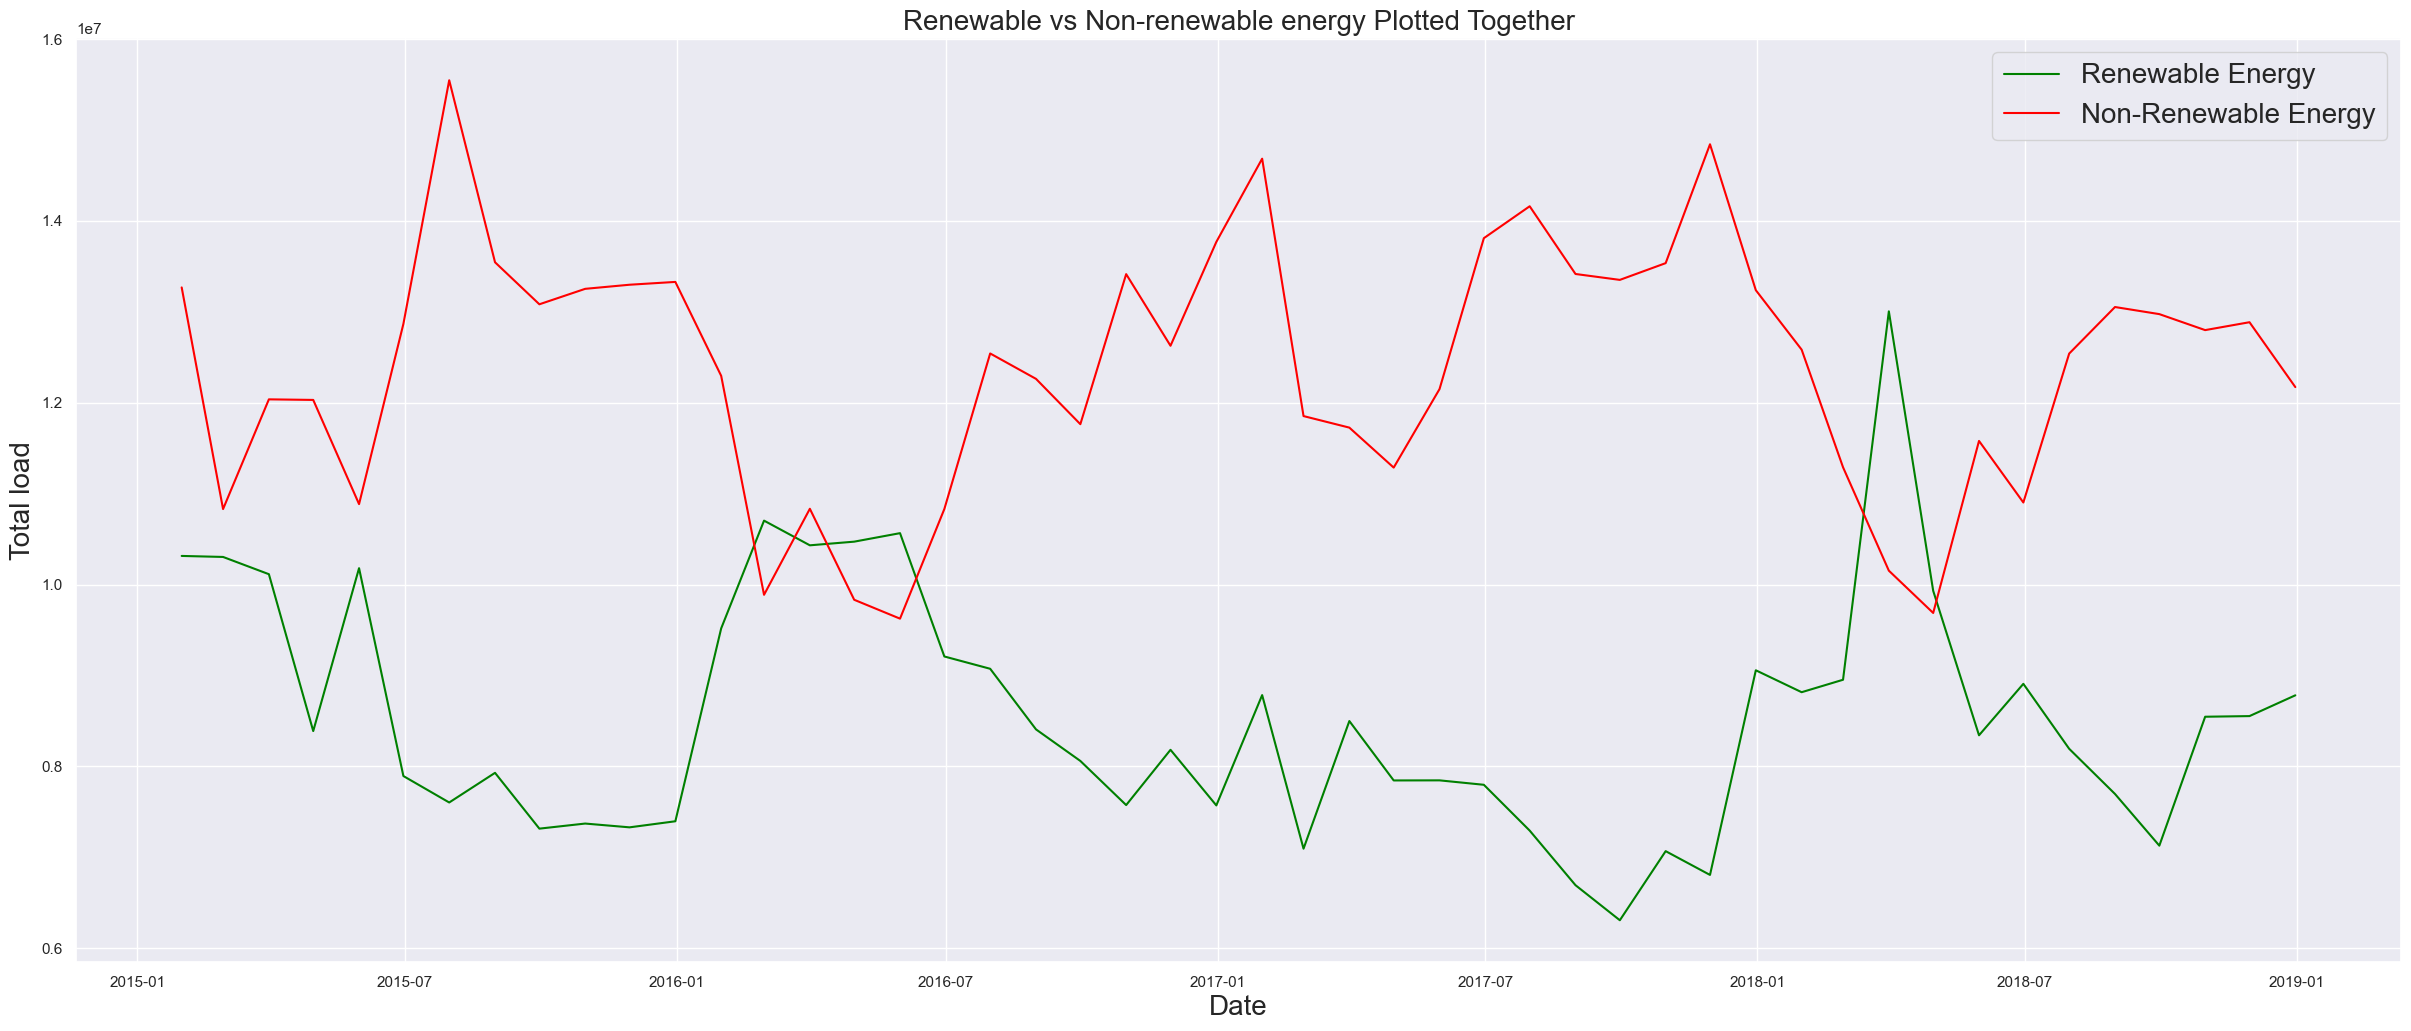

In [28]:
#renewable vs non-renew energy chart
plt.figure(figsize=(30, 12))

# Plotting data from renew
plt.plot(renew_data.index, renew_data['total_renew'], label='Renewable Energy', color='Green')

# Plotting data from non-renew
plt.plot(nonrenew_data.index, nonrenew_data['total_nowrenew'], label='Non-Renewable Energy', color='Red')

plt.xlabel('Date',fontsize=20)
plt.ylabel('Total load',fontsize=20)
plt.title('Renewable vs Non-renewable energy Plotted Together',fontsize=20)
plt.legend(fontsize=20)

# Displaying the plot
plt.grid(True)
plt.show()
